In [1]:
import Feature_importance
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('analysis_data.csv',encoding='utf-16')
df_duration = pd.read_csv('duration_survey_df.csv',encoding='utf-16')

In [3]:
video_df = df_duration[['Project_Id','duration']]
video_df = video_df.rename(columns = {'duration':'video_duration'})

In [4]:
final_df = pd.merge(df,video_df,how='left')

In [5]:
final_df.shape

(1315, 36)

In [6]:
final_df.columns.tolist()

['Project_Id',
 'Project_launched_at',
 'Project_deadline',
 'Project_goal',
 'Project_category',
 'Date',
 'Days_to_go',
 'Pledged',
 'Options_number',
 'Title_count',
 'Blurb_count',
 'Content_text_length',
 'Content_img_count',
 'Faq_count',
 'Update_count',
 'Comment_count',
 'Backers',
 'Video_name',
 'Cancel_check',
 'Project_title',
 'Project_blurb',
 'Backed_count',
 'Created_count',
 'num_crawl',
 'duration',
 'diff',
 'Success',
 'backer1',
 'backer2',
 'backer3',
 'ratio1',
 'ratio2',
 'ratio3',
 'Top_category',
 'super_category',
 'video_duration']

In [7]:
Analysis_df = final_df[['duration','Project_goal','video_duration','Update_count','Project_blurb','Faq_count',\
    'Created_count','Backed_count','ratio1','ratio2','ratio3','backer1','backer2','backer3','Success']]

In [8]:
# Project_blurb
Analysis_df['Project_blurb'] = Analysis_df['Project_blurb'].apply(lambda x : len(x))
# Backed_count
Analysis_df['Backed_count'] = Analysis_df['Backed_count'].apply(lambda x : 0 if x =='None' else x)
Analysis_df['Backed_count'] = Analysis_df['Backed_count'].apply(lambda x : float(x))

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

## Feature importance

In [17]:
Analysis_df.shape
imporntace_model = Feature_importance.feature_importance(Analysis_df,'Success',scaler='std')

### Chi-squre

In [14]:
imporntace_model.chisquare()

Feature ranking:
Rank : 1 	 Feature : Update_count (21.204169)
Rank : 2 	 Feature : Faq_count (12.430616)
Rank : 3 	 Feature : backer3 (11.967733)
Rank : 4 	 Feature : Created_count (11.820968)
Rank : 5 	 Feature : backer2 (11.458191)
Rank : 6 	 Feature : backer1 (10.684485)
Rank : 7 	 Feature : Backed_count (8.231883)
Rank : 8 	 Feature : Project_goal (1.489742)
Rank : 9 	 Feature : duration (1.102459)
Rank : 10 	 Feature : ratio3 (0.953597)
Rank : 11 	 Feature : ratio2 (0.953217)
Rank : 12 	 Feature : ratio1 (0.947677)
Rank : 13 	 Feature : Project_blurb (0.021570)
Rank : 14 	 Feature : video_duration (0.011886)


### Random forest

/Users/yonggeol/workspace/Research/[2019]Kickstarter_Crwodsourcing/Kickstarter/Data explore/Feature_importance.py:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x, self.y)


Feature ranking:
Rank : 0 	 Feature : ratio3 (0.260429)
Rank : 1 	 Feature : ratio1 (0.253541)
Rank : 2 	 Feature : backer2 (0.231813)
Rank : 3 	 Feature : ratio2 (0.123093)
Rank : 4 	 Feature : Update_count (0.063214)
Rank : 5 	 Feature : Project_goal (0.030504)
Rank : 6 	 Feature : backer1 (0.023088)
Rank : 7 	 Feature : backer3 (0.014318)
Rank : 8 	 Feature : Backed_count (0.000000)
Rank : 9 	 Feature : Created_count (0.000000)
Rank : 10 	 Feature : Faq_count (0.000000)
Rank : 11 	 Feature : Project_blurb (0.000000)
Rank : 12 	 Feature : video_duration (0.000000)
Rank : 13 	 Feature : duration (0.000000)


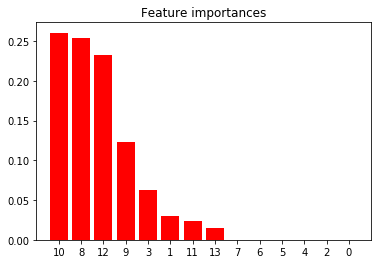

In [15]:
imporntace_model.random_forest()

### Logistic regression

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Feature ranking:
Rank : 1 	 Feature : Project_goal (100.000000)
Rank : 2 	 Feature : backer3 (79.066790)
Rank : 3 	 Feature : backer2 (64.101063)
Rank : 4 	 Feature : backer1 (46.138679)
Rank : 5 	 Feature : Update_count (41.889987)
Rank : 6 	 Feature : Created_count (20.510055)
Rank : 7 	 Feature : duration (15.800531)
Rank : 8 	 Feature : ratio2 (4.872748)
Rank : 9 	 Feature : ratio3 (4.816336)
Rank : 10 	 Feature : ratio1 (3.767343)
Rank : 11 	 Feature : Project_blurb (3.216915)
Rank : 12 	 Feature : Faq_count (2.856145)
Rank : 13 	 Feature : video_duration (0.190349)
Rank : 14 	 Feature : Backed_count (0.058650)


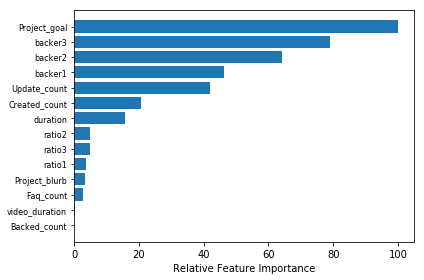

In [16]:
imporntace_model.logistic_regression()